In [ ]:
# #-- Descomprimimos el dataset
# !rm -r mnist
#!unzip mnist.zip

In [ ]:
#--- Buscamos las direcciones de cada archivo de imagen
from glob import glob

train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

train_files[0]

'./mnist/train/1/6783.png'

In [ ]:
#--- Ordenamos los datos de forma aleatoria para evitar sesgos
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(6000, 2000, 992)

In [ ]:
#--- Cargamos los datos de vaidación en listas

from PIL import Image

N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )

In [ ]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def train_valid(model, input_dim, out_dim, n_epoch, optmizer, criterion):
  print(model)

  loss_train = []
  f1_train = []
  acc_train = []

  loss_valid = []
  f1_valid = []
  acc_valid = []

  for epoch in range(n_epoch):
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )

    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc) 

  
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.plot(range(n_epoch), loss_train, label='train')
  plt.plot(range(n_epoch), loss_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid()
  plt.subplot(1,3,2)
  plt.plot(range(n_epoch), f1_train, label='train')
  plt.plot(range(n_epoch), f1_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('f1_score')
  plt.legend()
  plt.grid()
  plt.subplot(1,3,3)
  plt.plot(range(n_epoch), acc_train, label='train')
  plt.plot(range(n_epoch), acc_valid, label='valid')
  plt.xlabel('n_epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid()
  plt.show()

# Primera Parte: cambiando el tamaño del set de entrenamiento

600 2000
Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)


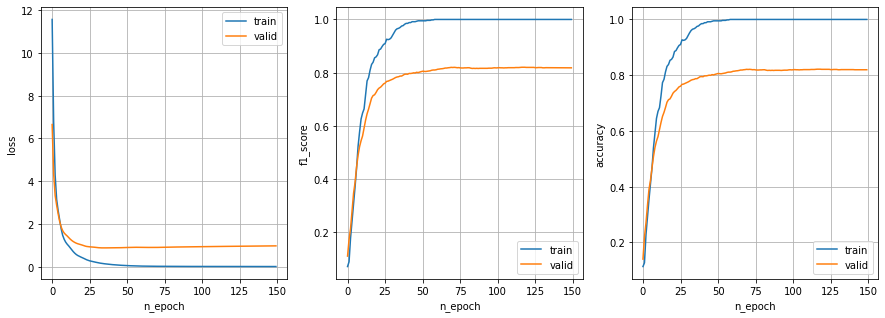

1200 2000
Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)


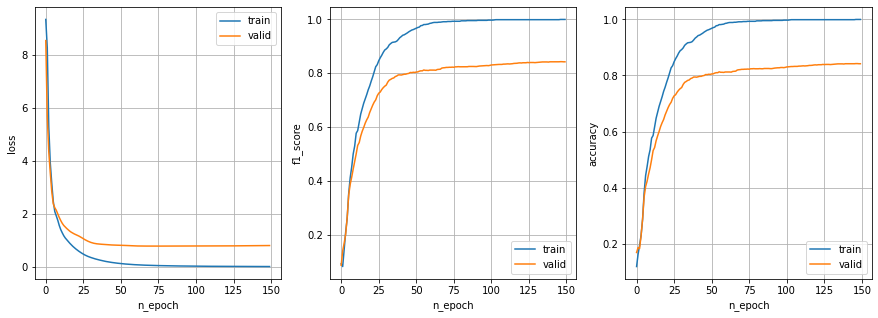

3000 2000
Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)


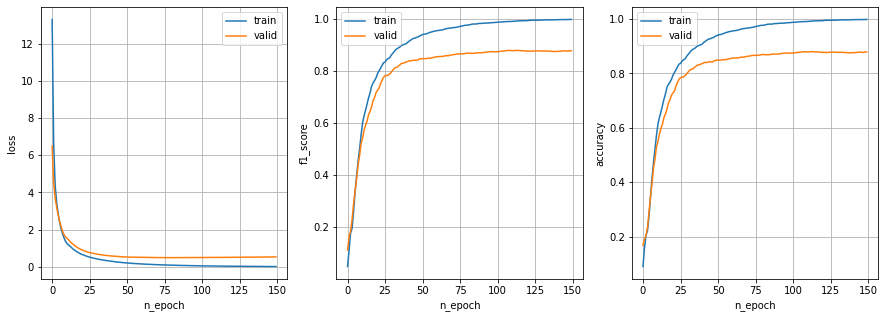

4800 2000
Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)


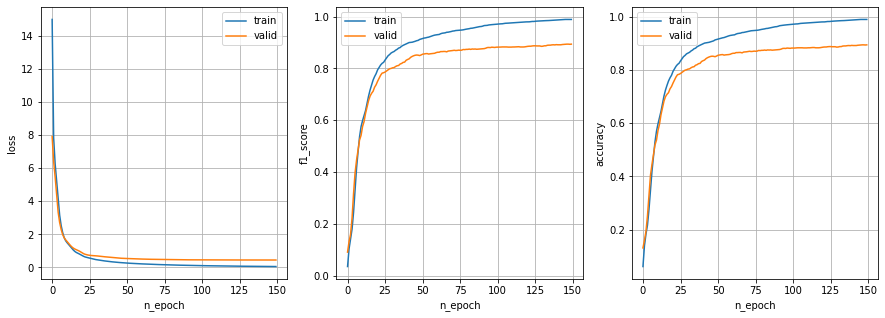

6000 2000
Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)


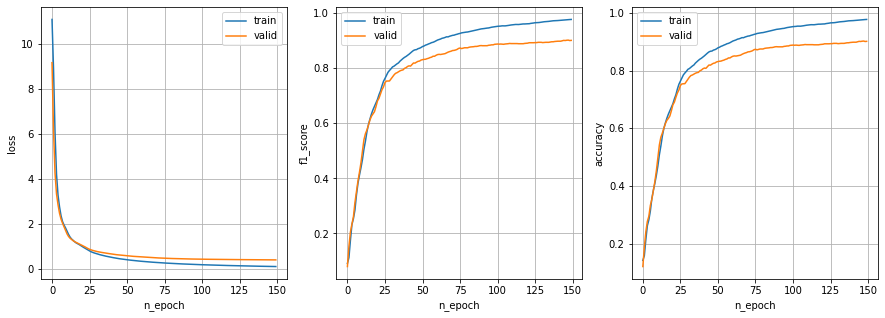

In [ ]:
#--- Cargamos los datos de entrenamiento en listas
from PIL import Image
import torch
from torch.autograd import Variable


porcentajes = [0.1,0.2,0.5,0.8,1]

for porcentaje in porcentajes:

  N_train = int( len(train_files)*porcentaje )
  X_train = []
  Y_train = []

  for i, train_file in enumerate(train_files[:N_train]):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))

  print(len(X_train), len(X_valid))

  X_train = Variable(torch.from_numpy(np.array(X_train))).float()
  Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

  X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
  Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

  input_dim = 28*28
  out_dim = 10
  hidden = 50

  model = torch.nn.Sequential(
      torch.nn.Linear(input_dim, hidden),
      torch.nn.ReLU(),       
      torch.nn.Linear(hidden, hidden),  
      torch.nn.ReLU(),               
      torch.nn.Linear(hidden, out_dim)
  )

  optimizer = torch.optim.Adam(model.parameters())
  criterion = torch.nn.CrossEntropyLoss()

  train_valid(model,input_dim,out_dim,150,optimizer,criterion)

#Segunda parte: Variando el tamaño del set de Testeo

In [ ]:

loss_test = []
f1_test = []
acc_test = []

porcentajes = [0.1,0.2,0.5,0.8,1]
n_epoch = 150

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

input_dim = 28*28
out_dim = 10
hidden = 50

model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden),
    torch.nn.ReLU(),       
    torch.nn.Linear(hidden, hidden),  
    torch.nn.ReLU(),               
    torch.nn.Linear(hidden, out_dim)
)

optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.CrossEntropyLoss()

for porcentaje in porcentajes:    

  for epoch in range(n_epoch):

    model.train()
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)

    Y_pred = torch.argmax(Y_pred, 1)

    acc = sum(Y_train == Y_pred)/len(Y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  model.eval()

  N_test = int( len(test_files)*porcentaje)
  X_test = []
  Y_test = []

  ts_files = test_files[:N_test]

  for i, test_file in enumerate(ts_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append( np.array(Image.open(test_file)) )

  X_test = Variable(torch.from_numpy(np.array(X_test))).float()
  Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

  Xts = X_test.view(X_test.size(0), -1)
  Y_pred = model(Xts)
  loss = criterion(Y_pred,Y_test)
  loss_test.append(loss.item())

  Y_pred = torch.argmax(Y_pred, 1)
  f1_test.append( f1_score(Y_test, Y_pred, average='macro') )

  acc = sum(Y_test == Y_pred)/len(Y_pred)
  acc_test.append(acc)

  print( '{}% of Test Evaluation Set loss: {}. f1:{} acc: {} '.format(porcentaje*100,loss_test[-1], f1_test[-1], acc_test[-1]) )

10.0% of Test Evaluation Set loss: 0.45009058713912964. f1:0.860366737254609 acc: 0.868686854839325 
20.0% of Test Evaluation Set loss: 0.651557445526123. f1:0.8647715442452284 acc: 0.8737373948097229 
50.0% of Test Evaluation Set loss: 0.539969801902771. f1:0.9061384521333478 acc: 0.9072580933570862 
80.0% of Test Evaluation Set loss: 0.6845623254776001. f1:0.9029887356075712 acc: 0.9029003977775574 
100% of Test Evaluation Set loss: 0.7110106348991394. f1:0.908715348552405 acc: 0.9092742204666138 
